In [13]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [14]:
# Load image
image_path = '../data/fishing_boat.bmp'
image = Image.open(image_path).convert('L')

# Convert the image to a numpy array
image_array = np.array(image)

In [15]:
# Functions to compute alpha and beta
def alpha(u, P):
    if u == 1:
        return np.sqrt(1/P)
    else:
        return np.sqrt(2/P)

def beta(v, Q):
    if v == 1:
        return np.sqrt(1/Q)
    else:
        return np.sqrt(2/Q)

In [16]:
# Function to compute the basis chip
def display_basis_chip(u, v, P=8, Q=8):
    # Compute alpha and beta
    a_u = alpha(u, P)
    b_v = beta(v, Q)
    
    # To create the graphs
    basis_chip = np.zeros((P, Q))
    x_values = np.arange(1, P + 1)
    y_values = np.arange(1, Q + 1)
    
    # Compute the individual components
    u_component = a_u * np.cos(np.pi * (2 * x_values - 1) * (u - 1) / (2 * P))
    v_component = b_v * np.cos(np.pi * (2 * y_values - 1) * (v - 1) / (2 * Q))
    
    # Calculate the basis chip
    for x in range(1, P+1):
        for y in range(1, Q+1):
            basis_chip[y-1, x-1] = u_component[x-1] * v_component[y-1]
    
    # Plot the basis chip and components in a grid-like layout
    fig = plt.figure(figsize=(8, 6))

    # V-component
    ax1 = fig.add_axes([0.05, 0.3, 0.25, 0.6])
    ax1.plot(v_component, y_values, color='blue')
    ax1.set_xlabel("Intensity")
    ax1.set_ylabel("Sample Index (v)")
    ax1.invert_yaxis()

    # Center: Basis chip
    ax2 = fig.add_axes([0.35, 0.3, 0.6, 0.6])
    im = ax2.imshow(basis_chip[::-1], cmap='gray', extent=(1, P, 1, Q))
    ax2.set_title(f"T(u={u}, v={v})")
    ax2.invert_yaxis()
    fig.colorbar(im, ax=ax2, orientation='vertical', label="Intensity")

    # U-component
    ax3 = fig.add_axes([0.35, 0.05, 0.6, 0.2])
    ax3.plot(x_values, u_component, color='blue')
    ax3.set_xlabel("Sample Index (u)")
    ax3.set_ylabel("Intensity")

    plt.show()

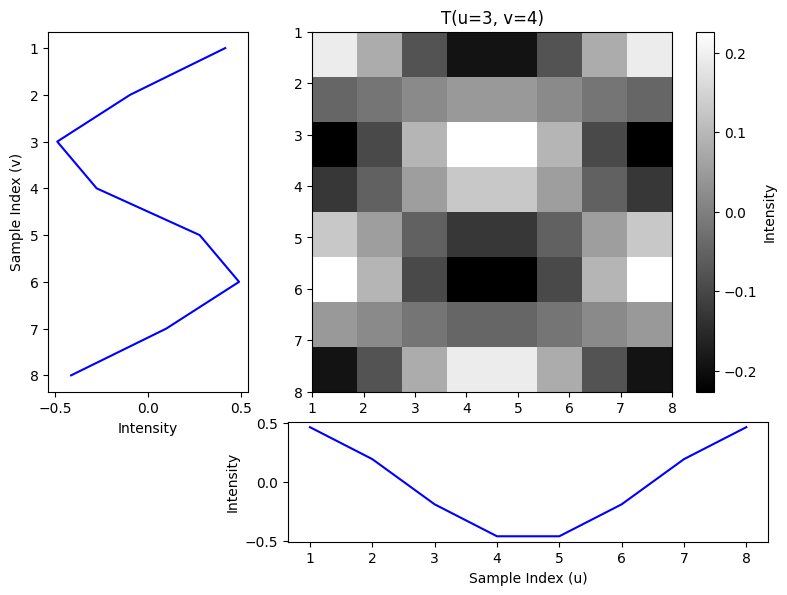

In [17]:
# Define variables for the Basis Chip
P = Q = 8

# Compute the basis chip (u, v) = (3, 4)
chip = display_basis_chip(3, 4, P, Q)

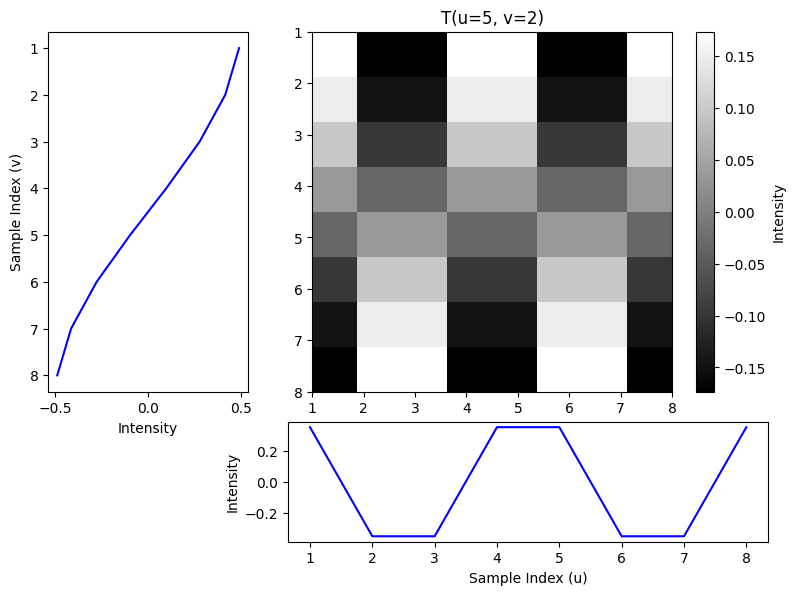

In [18]:
# Compute the basis chip (u, v) = (5, 2)
chip = display_basis_chip(5, 2, P, Q)

In [19]:
# Function to get the basis chip
def get_basis_chip(u, v, P=8, Q=8):
    # Compute alpha and beta
    a_u = alpha(u, P)
    b_v = beta(v, Q)
    
    # Create empty basis chip
    basis_chip = np.zeros((P, Q))
    
    # Calculate the basis chip
    for x in range(1, P+1):
        for y in range(1, Q+1):
            basis_chip[y-1, x-1] = a_u * b_v * np.cos(np.pi * (2 * x - 1) * (u - 1) / (2 * P)) * np.cos(np.pi * (2 * y - 1) * (v - 1) / (2 * Q))
    
    # Return the basis chip
    return basis_chip[::-1]

In [20]:
# Function to calculate convert basis chip into basis vector
def get_basis_vector_matrix(K=8):
    num_basis_vectors = K**2
    
    # Initialize the 64x64 basis vector matrix
    basis_vector_matrix = np.zeros((num_basis_vectors, num_basis_vectors))
    
    # Get all basis chips and rasterize them into column vectors
    index = 0
    for u in range(1, K + 1):
        for v in range(1, K + 1):
            # Get the basis chip
            basis_chip = get_basis_chip(u, v, P=K, Q=K)
            
            # Rasterize the basis chip into a column vector
            basis_vector_matrix[:, index] = basis_chip.flatten(order='F')
            index += 1
    
    # Display the basis vector matrix
    plt.figure(figsize=(8, 8))
    plt.imshow(basis_vector_matrix, cmap='gray')
    plt.title("64 × 64 Basis Vector Matrix")
    plt.colorbar(label="Intensity")
    plt.xlabel("Basis Vector Index")
    plt.ylabel("Pixel Location Index")
    plt.show()
    
    return basis_vector_matrix

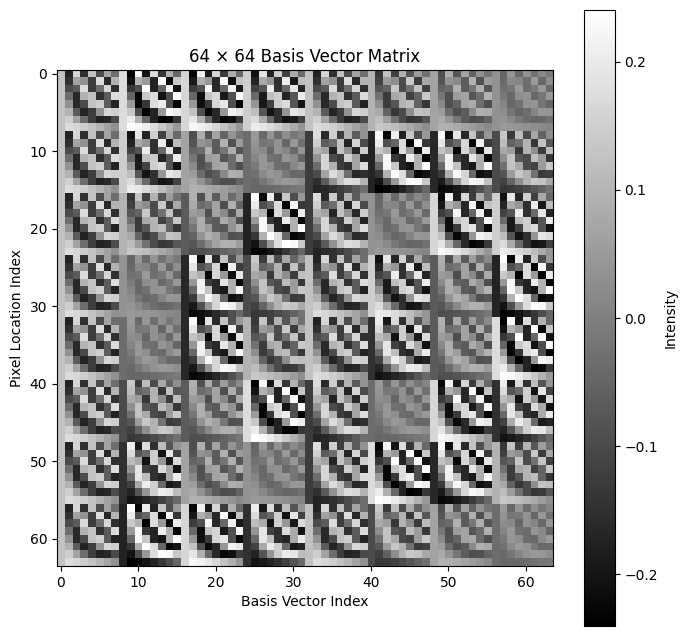

array([[ 0.125     , -0.17337998,  0.16332037, ..., -0.02709659,
         0.01866446, -0.00951506],
       [ 0.125     , -0.14698445,  0.06764951, ...,  0.04783543,
        -0.04505999,  0.02709659],
       [ 0.125     , -0.09821187, -0.06764951, ..., -0.00951506,
         0.04505999, -0.04055292],
       ...,
       [ 0.125     ,  0.09821187, -0.06764951, ..., -0.00951506,
        -0.04505999, -0.04055292],
       [ 0.125     ,  0.14698445,  0.06764951, ...,  0.04783543,
         0.04505999,  0.02709659],
       [ 0.125     ,  0.17337998,  0.16332037, ..., -0.02709659,
        -0.01866446, -0.00951506]], shape=(64, 64))

In [21]:
get_basis_vector_matrix(8)